# Naive Bayes Classifier

A Naive Bayes Classifier is a collection of classifiers that apply Bayes theorem between features in our dataset. We are going to look at this type of classifier in a lot of detail throughout this notebook. 

In [3]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.
#It is important to have this code in the notebook so we use the array with the NB Classifier

import numpy as np
import pandas as pd

df = pd.read_csv('news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()


# We need the Vectorization

df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)

## Multinomial Naive Bayes

This type of Naive Bayes is for classification of data. We will experiment with this type of Naive Bayes.

Multinomial Naive Bayes is a type of Naive Bayes.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size = 0.3, random_state=42)

We now have split our data into training data and test data. We can now input our training data into the Gaussian Naive Bayes model.

In [9]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit (x_train,y_train)
Accuracy = MNB.score(x_test, y_test)
print(Accuracy)
%time MNB.fit(x_train,y_train)

0.8011572856391374
CPU times: user 14.9 ms, sys: 753 µs, total: 15.6 ms
Wall time: 15.6 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [4]:
size = np.arange(0.01,0.5,0.01)
accuracy = []
for i in size:
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size = i, random_state = 42)
    MNB.fit(x_train, y_train)
    a = MNB.score(x_test,y_test)
    accuracy.append(a)
accuracy

[0.8125,
 0.8267716535433071,
 0.8272251308900523,
 0.8346456692913385,
 0.8264984227129337,
 0.8320209973753281,
 0.831081081081081,
 0.8264299802761341,
 0.8283712784588442,
 0.832807570977918,
 0.8321377331420373,
 0.8331143232588699,
 0.8300970873786407,
 0.8387824126268321,
 0.8391167192429022,
 0.8274161735700197,
 0.819870009285051,
 0.8220858895705522,
 0.8264119601328903,
 0.8232044198895028,
 0.8204357625845229,
 0.8199426111908178,
 0.8237311385459534,
 0.8244575936883629,
 0.8200757575757576,
 0.8125,
 0.8158971361776739,
 0.8117249154453213,
 0.8041349292709467,
 0.8011572856391374,
 0.8014256619144603,
 0.7958579881656804,
 0.7924438067910091,
 0.7938718662952646,
 0.7953110910730388,
 0.7860587461639632,
 0.7794368600682594,
 0.7836378737541528,
 0.7842978551193849,
 0.7880820836621941,
 0.7825250192455735,
 0.7812852311161218,
 0.7790825688073395,
 0.7786944045911047,
 0.7730620834794809,
 0.7725557461406518,
 0.7696440564137005,
 0.7737586320289378,
 0.7729468599033816

Text(0, 0.5, 'Accuracy of Multinomial Naive Bayes Classifier')

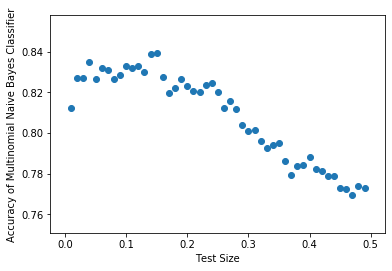

In [12]:
import matplotlib.pyplot as plt
plt.scatter(size, accuracy)
plt.xlabel('Test Size')
plt.ylabel('Accuracy of Multinomial Naive Bayes Classifier')

In [6]:
size[np.argmax(accuracy)]

0.15000000000000002

## Confusion Matrix

A way in which we can interpret how well our classifiers work with our chosen data set is by creating a confusion matrix. Also known as an error matrix, it is a great way in enabling us to visualise how a supervised learning technique performs. 

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,MNB.predict(x_test)))
print(classification_report(y_test,MNB.predict(x_test)))

[[ 871  690]
 [  15 1529]]
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      1561
           1       0.69      0.99      0.81      1544

    accuracy                           0.77      3105
   macro avg       0.84      0.77      0.76      3105
weighted avg       0.84      0.77      0.76      3105



## Testing on Unseen data

We now want to see how Naive Bayes classifier works for unseen data. It will be interesting to see how effective it is on a completely different data set.  

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()
    

def article_preprocessor (article):
    filtered_article = ''
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    return filtered_article

In [9]:
def MultinomialNB_classifier (list_of_articles):
    
    # Pre-process the articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    new_input = df_input.append(pd.Series(articles_pp))
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)
    accuracy = MNB.score(x_test,y_test)
    print('Multinomial Naive Bayes model accuracy: ' + str(accuracy))
    # The model can now classify the new data
    predictions = MNB.predict(new_data_matrix)
    
    return predictions

In [10]:
# The top news story on the BBC
bbc_news_article = '''The furlough scheme will be extended until the end of September by the chancellor in the Budget later.
Rishi Sunak said the scheme - which pays 80% of employees' wages for the hours they cannot work in the pandemic - would help millions through "the challenging months ahead".
Some 600,000 more self-employed people will also be eligible for government help as access to grants is widened.
But Labour said the support schemes should have been extended "months ago".
Mr Sunak will outline a three-point plan to support people through the coming months, rebuild the economy and "fix" the public finances in the wake of the pandemic when he delivers his statement to the Commons at about 12:30 GMT.
But he has warned of tough economic times ahead and there are reports that he plans to raise some taxes.'''

# Here's a fake news article from the New York Mag
fake_article = '''Twelve days out from judgment day in an election in which he continues to trail badly, President Trump continues to hammer home an issue that will surely resonate with that small slice of still-undecided voters: his supposedly unfair treatment at the hands of CBS’s Lesley Stahl. After two days of promising to release unedited footage of an as-yet-unaired 60 Minutes interview, during which he walked out prematurely because he was upset with Stahl’s line of questioning, the president finally followed through on Thursday. Throughout the interview, Stahl presses Trump on issues from health care (the president says he hopes the Supreme Court strikes down Obamacare, a politically toxic position) to his derogatory comments about Anthony Fauci (Trump claims he was misinterpreted) to his false claims that the Obama campaign spied on him. The tone is of an adversarial back-and-forth, well within normal journalistic bounds. Nevertheless, Trump continuously claims that Joe Biden hasn’t been given similar treatment by CBS and cuts the proceedings short.'''

In [11]:
articles = [bbc_news_article,fake_article]
MultinomialNB_classifier(articles)

Multinomial Naive Bayes model accuracy: 0.8200757575757576


array([1, 1])

We can see that it predicted that both the articles were true, however the second news article was in fact false!